In [1]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


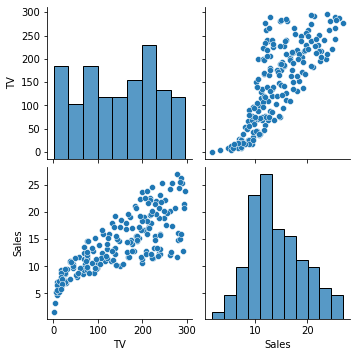

In [12]:
#scatterplot

import matplotlib.pyplot as plt
import seaborn as sns
#load data
df=pd.read_csv("tvmarketing.csv")
sns.pairplot(df)
plt.show()



      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
TV       0
Sales    0
dtype: int64


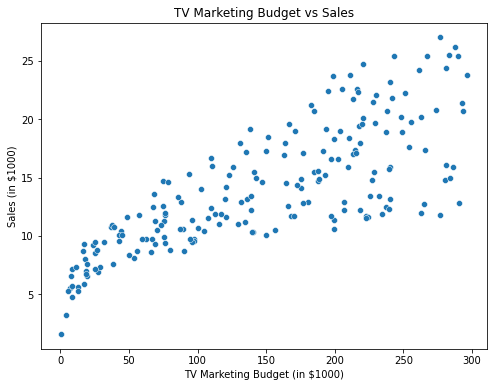

In [4]:
#scatterplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
#load data
df=pd.read_csv("tvmarketing.csv")
print(df.head())
print(df.isnull().sum())
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['TV'], y=df['Sales'])
plt.xlabel("TV Marketing Budget (in $1000)")
plt.ylabel("Sales (in $1000)")
plt.title("TV Marketing Budget vs Sales")
plt.show()

In [13]:
#6question
# Prepare feature (X) and response variable (y)
X = df[['TV']]  # Independent variable (Feature)
y = df['Sales']  # Dependent variable (Response)

# Display first few values
print("Feature Variables (X):\n", X.head())
print("\nResponse Variable (y):\n", y.head())


Feature Variables (X):
       TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8

Response Variable (y):
 0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("tvmarketing.csv")

# Define feature (X) and response variable (y)
X = df[['TV']]  # Independent variable
y = df['Sales']  # Dependent variable

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of training and testing sets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (140, 1)
X_test Shape: (60, 1)
y_train Shape: (140,)
y_test Shape: (60,)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()#alpha and beta
model.fit(X_train, y_train)
intercept=model.intercept_
coeffient=model.coef_
print("intercept is",intercept)
print("coeff is:",coeffient)

intercept is 7.239459830751138
coeff is: [0.0464078]


In [25]:
# Predict on test data
y_pred = model.predict(X_test)

In [27]:
# 9. Perform Linear Regression (on train data) without using any library and
# print the coefficients values

# Performing Linear Regression without using any library

# Calculating the mean of X_train and y_train
X_train_mean = X_train['TV'].mean()
y_train_mean = y_train.mean()

# Calculating the slope (m) of the regression line
numerator = ((X_train['TV'] - X_train_mean) * (y_train - y_train_mean)).sum()
denominator = ((X_train['TV'] - X_train_mean) ** 2).sum()
slope = numerator / denominator

# Calculating the intercept (c) of the regression line
intercept = y_train_mean - (slope * X_train_mean)

slope, intercept


(0.04640780212815278, 7.2394598307511355)

In [28]:
from sklearn.linear_model import LinearRegression

# Step 2: Initialize and Train the Model
model = LinearRegression()#alpha and beta
model.fit(X_train, y_train)

# Step 3: Extract Model Coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (a):", intercept)
print("Coefficients (b1, b2, b3):", coefficients)

Intercept (a): 7.239459830751138
Coefficients (b1, b2, b3): [0.0464078]


In [29]:

predicted_y = model.predict(X_test)


In [30]:
print(y_train[:5])

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
Name: Sales, dtype: float64


In [31]:
print(predicted_y[:5])

[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


In [34]:
X_train["TV"]

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 140, dtype: float64

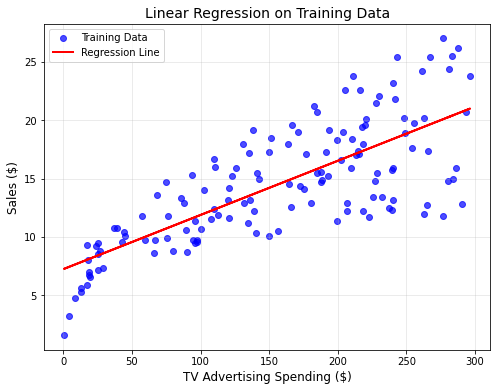

In [35]:
import numpy as np

# Values for slope (beta_1) and intercept (beta_0) from previous calculation
beta_1 = slope
beta_0 = intercept

# Generate predicted values based on the regression line
y_pred = beta_0 + beta_1 * X_train['TV']

# Scatter plot of the original training data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)
plt.plot(X_train, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression on Training Data', fontsize=14)
plt.xlabel('TV Advertising Spending ($)', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [36]:
model.predict(np.array([[250],]))

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.84141036])

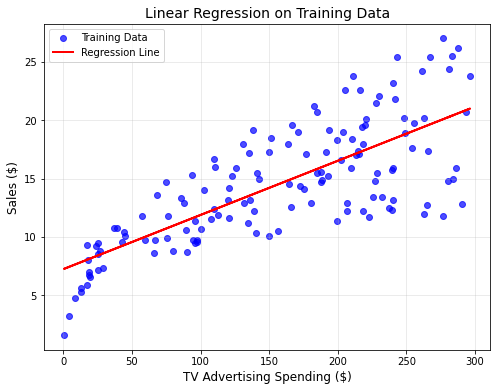

In [37]:
import numpy as np

beta_1 = slope
beta_0 = intercept

y_pred = beta_0 + beta_1 * X_train['TV']

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)
plt.plot(X_train, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression on Training Data', fontsize=14)
plt.xlabel('TV Advertising Spending ($)', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [38]:
# Make predictions on the testing set - y_pred

def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

# Generating predictions for the testing set
y_pred = predict(X_test['TV'], intercept, slope)

# Displaying the first few predictions alongside the actual values
pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred.values
}).head()


,Actual Sales,Predicted Sales
0,16.9,14.817854
1,22.4,16.307544
2,21.4,20.832305
3,7.3,7.782431
4,24.7,17.463099


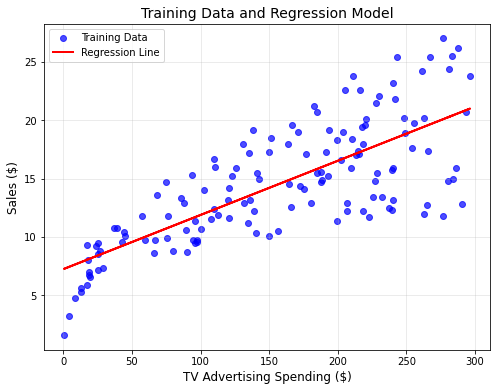

In [39]:
# 14.Plot train data and the model
import matplotlib.pyplot as plt

# Plot the training data and regression line
plt.figure(figsize=(8, 6))

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Regression line
y_train_pred = intercept + slope * X_train['TV']  # Calculate predictions for the training set
plt.plot(X_train, y_train_pred, color='red', label='Regression Line', linewidth=2)

# Labels and title
plt.title('Training Data and Regression Model', fontsize=14)
plt.xlabel('TV Advertising Spending ($)', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


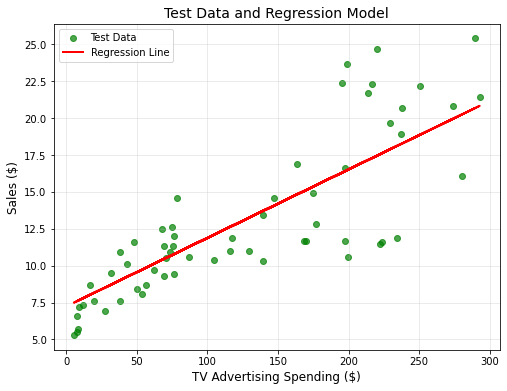

In [40]:
# 15.Plot test data and the model

import matplotlib.pyplot as plt

# Plot the test data and regression line
plt.figure(figsize=(8, 6))

# Scatter plot for test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Regression line
y_test_pred = intercept + slope * X_test['TV']  # Calculate predictions for the test set
plt.plot(X_test, y_test_pred, color='red', label='Regression Line', linewidth=2)

# Labels and title
plt.title('Test Data and Regression Model', fontsize=14)
plt.xlabel('TV Advertising Spending ($)', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [41]:
# 16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R-squared Value
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 8.97
R-squared (R²): 0.67


In [7]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
df.isna().sum()

TV       0
Sales    0
dtype: int64

In [11]:
df.shape()

TypeError: 'tuple' object is not callable

In [12]:
df.drop_duplicates()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("tvmarketing.csv")

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values  # Corrected this line
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("tvmarketing.csv")

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 7.119638430592953
Coefficients: [0.04652973]


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Load data
df = pd.read_csv("tvmarketing.csv")

# Define features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)


Intercept: 7.119638430592953
Coefficients: [0.04652973]


0.6766954295627076